In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaustubhb999/tomatoleaf")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tomatoleaf


In [2]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

In [5]:
import os

# Check the contents of the dataset directory
dataset_dir = '/kaggle/input/tomatoleaf'
print("Contents of the dataset directory:", os.listdir(dataset_dir))


Contents of the dataset directory: ['tomato']


In [17]:
#The image_dataset_from_directory function is used to load image data from a directory.
#Images are resized to 256x256 pixels and grouped into batches of 32 for training efficiency.
#Labels are inferred from the directory structure and represented in a categorical format.
#Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0.

In [6]:
dataset_path = '/kaggle/input/tomatoleaf/tomato/train'

# Load the dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,  # Path to the train directory
    labels='inferred',  # Auto-detect labels from subdirectories
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32  # Set batch size
)

# Print train_data to indicate completion and to inspect the data
print(train_data)
train_data = train_data.map(lambda x, y: (x / 255.0, y))


Found 10000 files belonging to 10 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [9]:
# Set the correct path to the validation directory
dataset_path = '/kaggle/input/tomatoleaf/tomato/val'

# Load the validation dataset
val_data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,  # Path to the validation directory
    labels='inferred',  # Auto-detect labels from subdirectories
    label_mode='categorical',  # Use categorical labels (one-hot encoding)
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32  # Set batch size
)
val_data = val_data.map(lambda x, y: (x / 255.0, y))



Found 1000 files belonging to 10 classes.


In [10]:
 #Optional: Checking the first batch
for images, labels in val_data.take(1):
    print(f'Image batch shape: {images.shape}')
    print(f'Label batch shape: {labels.shape}')

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32, 10)


In [18]:
#Visualizing The Data
#The code sets the path to a directory containing images of tomato leaves affected by the Tomato Yellow Leaf Curl Virus and so on in the next cells of code.
#It retrieves a list of all image file names in the directory.
#Using matplotlib, it displays the first 6 images along with their corresponding labels.
#For each image, it loads the image, displays it in a subplot, and sets the title to the image label, showing the visual representation of the dataset.

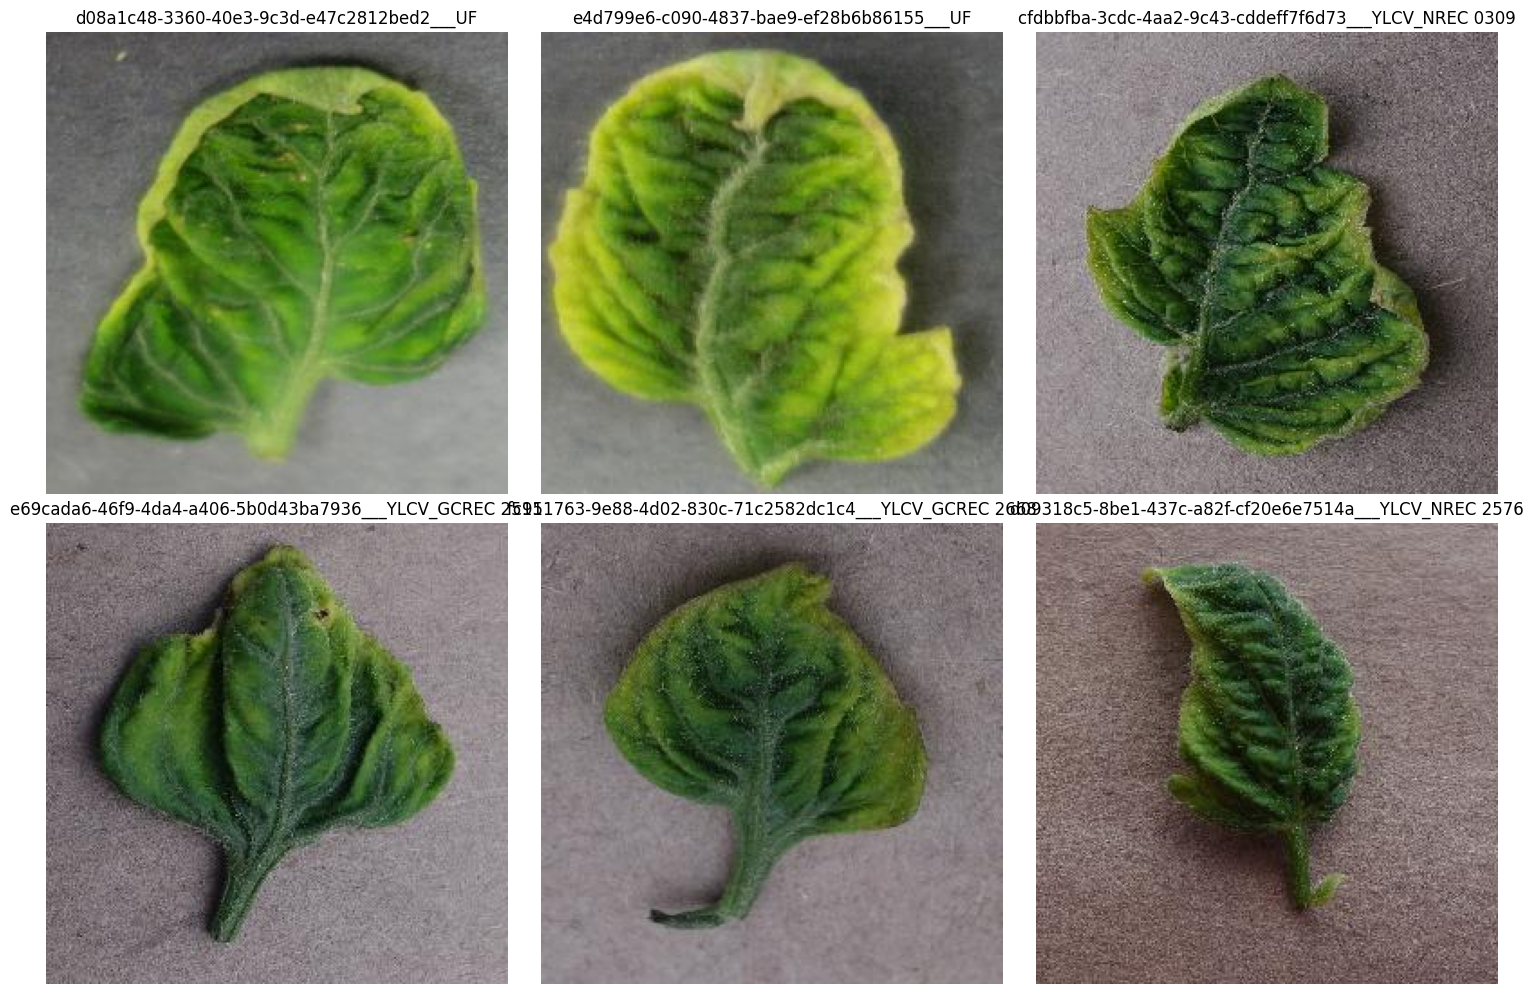

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory containing images of a specific class
path = '/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]  # Label based on the file name (if needed)

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


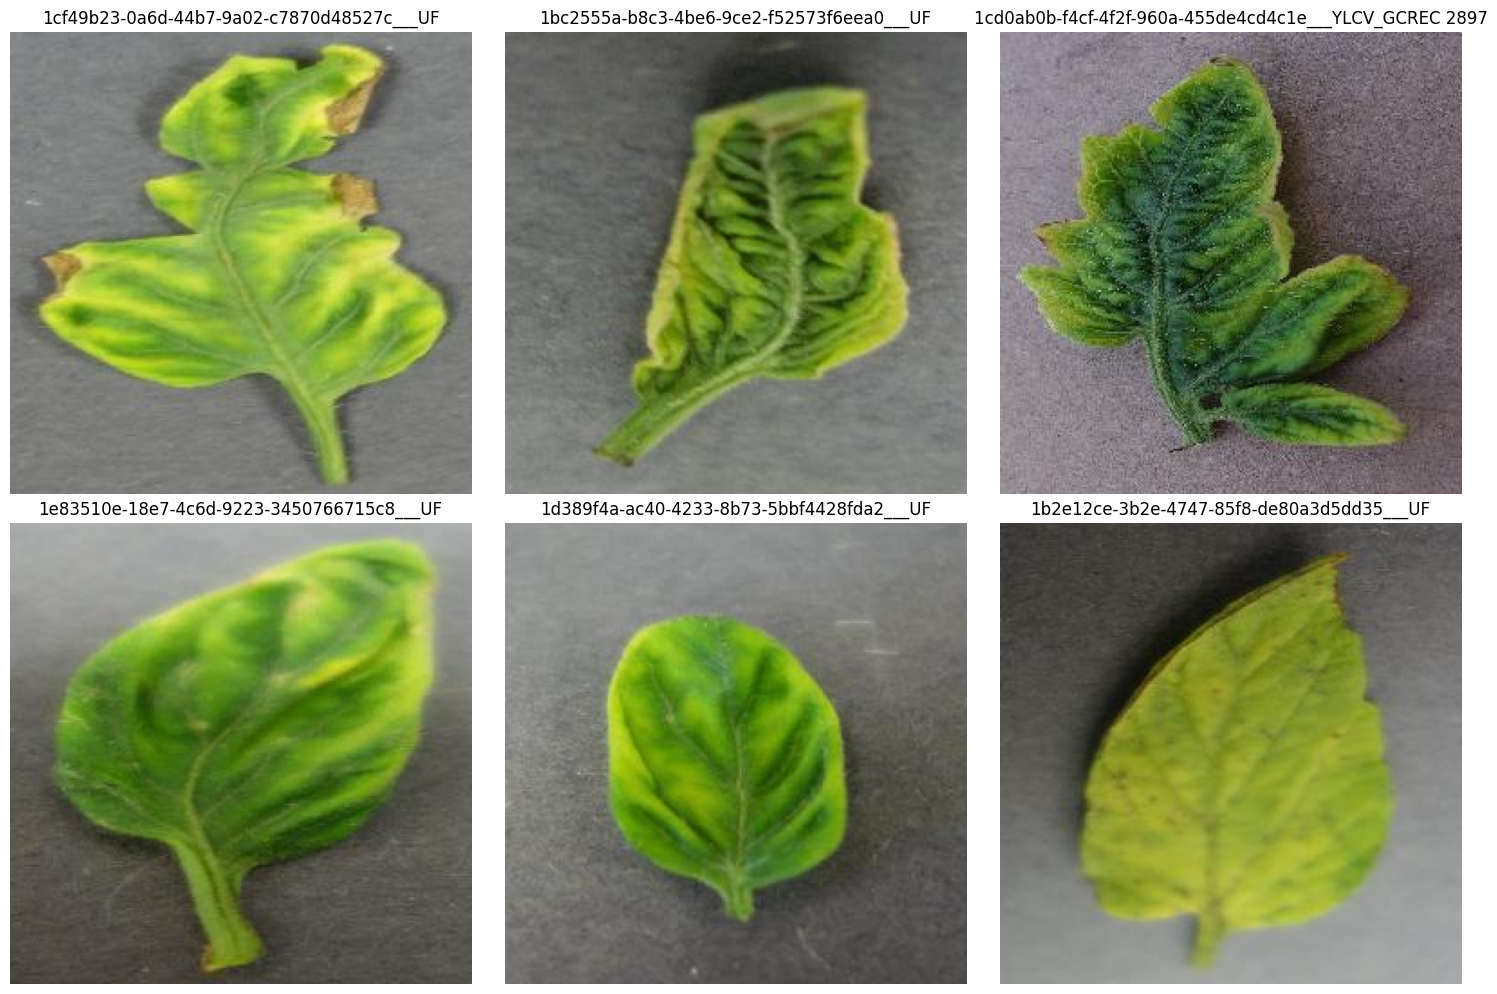

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory containing images of a specific class in validation
val_path = '/kaggle/input/tomatoleaf/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus'

# Get a list of all image file names in the directory
val_image_files = [f for f in os.listdir(val_path) if os.path.isfile(os.path.join(val_path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    val_image_file = val_image_files[i]
    label = val_image_file.split('.')[0]  # Label based on the file name (if needed)

    # Load and display the image
    img_path = os.path.join(val_path, val_image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


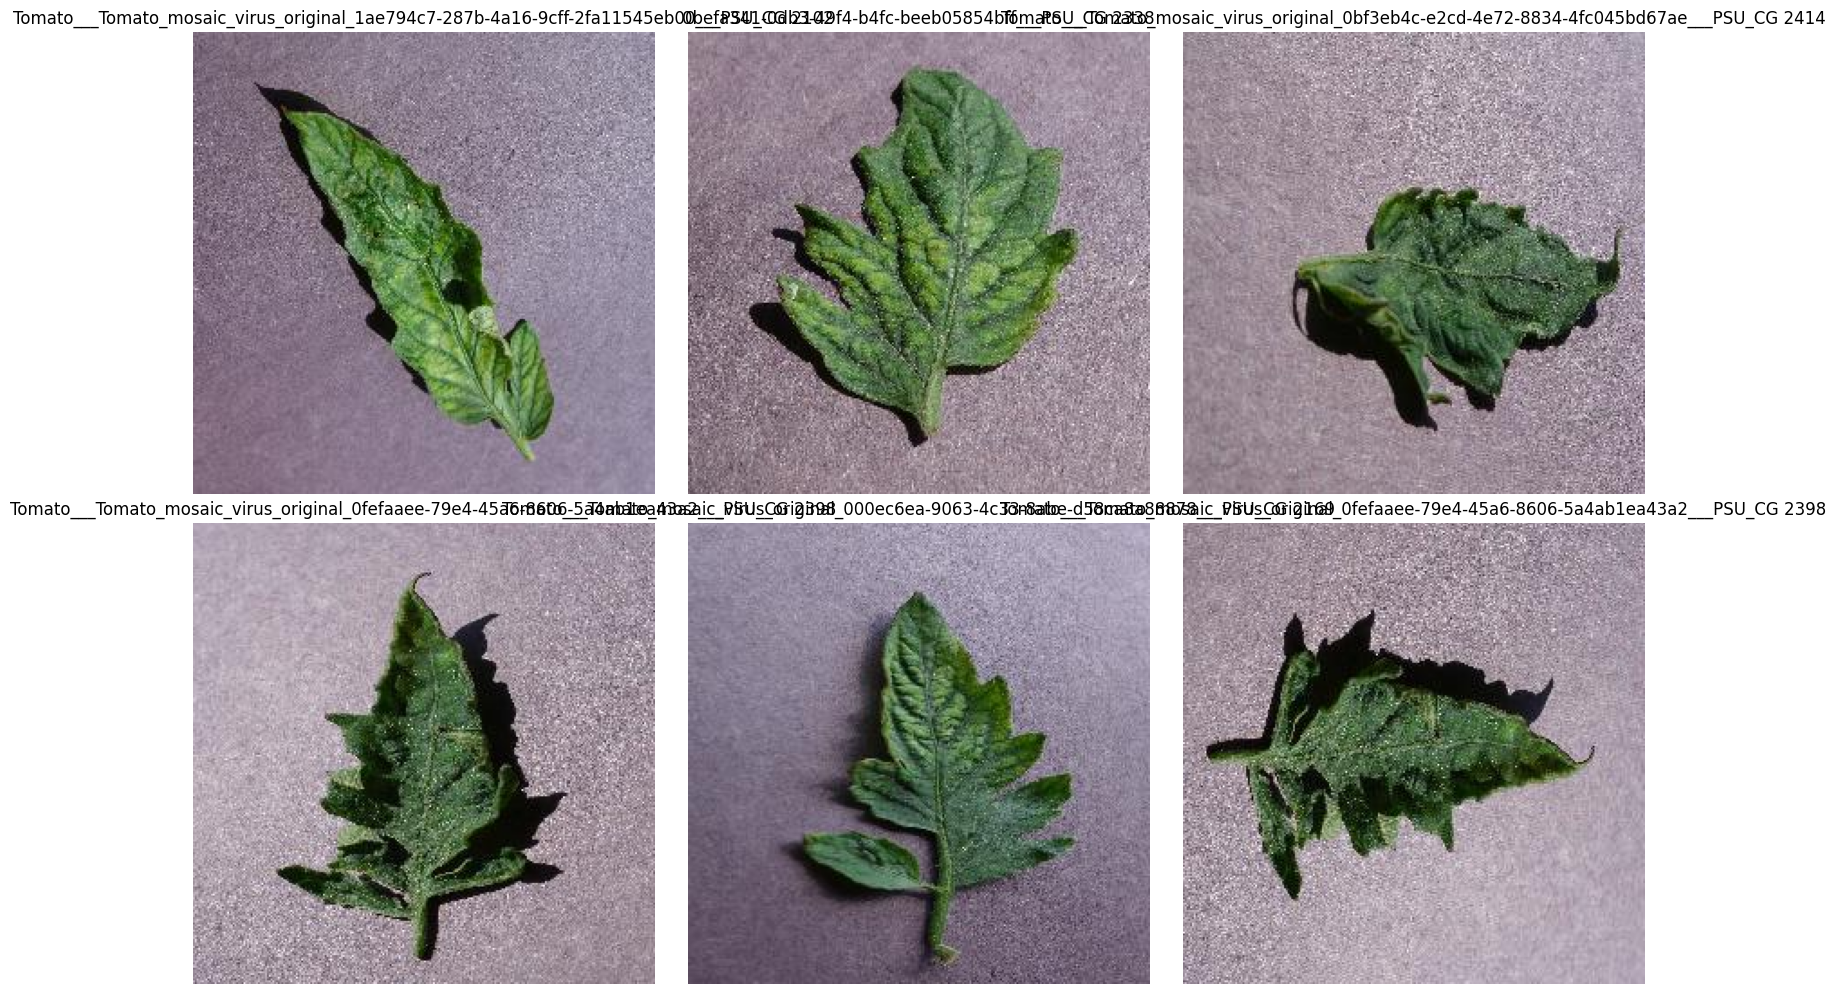

In [14]:

# Path to the directory containing images of a specific class in validation
val_path = '/kaggle/input/tomatoleaf/tomato/val/Tomato___Tomato_mosaic_virus'
# Get a list of all image file names in the directory
val_image_files = [f for f in os.listdir(val_path) if os.path.isfile(os.path.join(val_path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    val_image_file = val_image_files[i]
    label = val_image_file.split('.')[0]  # Label based on the file name (if needed)

    # Load and display the image
    img_path = os.path.join(val_path, val_image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


In [15]:
# Reload dataset to get class names before any transformation
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

# Get the class names from the training data
class_names = train_data.class_names

# Print the number of classes and their names
print(f"Total number of classes: {len(class_names)}")
print("Class names:", class_names)



Found 10000 files belonging to 10 classes.
Total number of classes: 10
Class names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [16]:
# Reload dataset to get class names before any transformation
val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

# Get the class names from the training data
class_names = train_data.class_names

# Print the number of classes and their names
print(f"Total number of classes: {len(class_names)}")
print("Class names:", class_names)

Found 1000 files belonging to 10 classes.
Total number of classes: 10
Class names: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [19]:
#Training the model
#The code initializes a DenseNet121 model with weights pre-trained on the ImageNet dataset.
#The include_top=False argument specifies that the model should not include the fully connected layers at the top of the network, which are typically used for ImageNet classification.
#The input_shape=(256,256,3) argument specifies the shape of the input images that the model expects, which is 256x256 pixels with 3 channels (RGB).
#The initialized model conv_base can be used as a feature extractor to extract features from images, which can then be used as input to a custom classification head.

In [20]:
# Load the base model (DenseNet121 without the top layers)
conv_base = DenseNet121(
    weights='imagenet',
    include_top=False,         # Exclude the top (fully connected) layers
    input_shape=(256, 256, 3), # Input shape for images
    pooling='avg'              # Use average pooling to compress the features
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
from tensorflow.keras import layers, models
# Freeze the convolutional base (we don't want to update the pre-trained weights)
conv_base.trainable = False

# Build the complete model
model = models.Sequential([
    conv_base,  # Add the pre-trained DenseNet121 as a base
    layers.Dense(256, activation='relu'),  # Add a dense layer with 256 units
    layers.Dropout(0.5),                   # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer (3 classes, use softmax for multi-class classification)
])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,302,474 (27.86 MB)

 Trainable params: 264,970 (1.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [26]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adam optimizer with a low learning rate
    loss='categorical_crossentropy',                            # Loss function for multi-class classification
    metrics=['accuracy']                                        # Metrics to track during training
)


In [27]:
# Train the model
history = model.fit(
    train_data,              # Training data
    epochs=10,               # Number of epochs (you can adjust this)
    validation_data=val_data,  # Validation data to evaluate during training
    batch_size=32            # Batch size
)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.2413 - loss: 3.9424 - val_accuracy: 0.6460 - val_loss: 1.1500
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.5669 - loss: 1.3022 - val_accuracy: 0.7370 - val_loss: 0.8957
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.6481 - loss: 1.0656 - val_accuracy: 0.7700 - val_loss: 0.7747
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7108 - loss: 0.9088 - val_accuracy: 0.7960 - val_loss: 0.6903
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.7281 - loss: 0.8351 - val_accuracy: 0.8060 - val_loss: 0.6308
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.7522 - loss: 0.7517 - val_accuracy: 0.8330 - val_loss: 0.5804
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.7752 - loss: 0.6926 - val_accuracy: 0.8390 - val_loss: 0.5451
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.7893 - loss: 0.6417 -

In [28]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8497 - loss: 0.4522
Validation Loss: 0.46237269043922424
Validation Accuracy: 0.8510000109672546


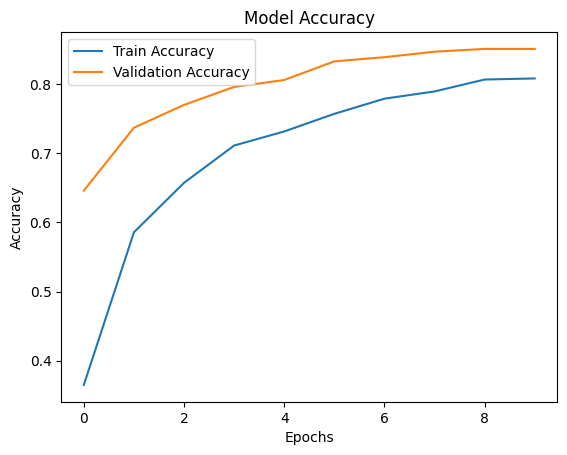

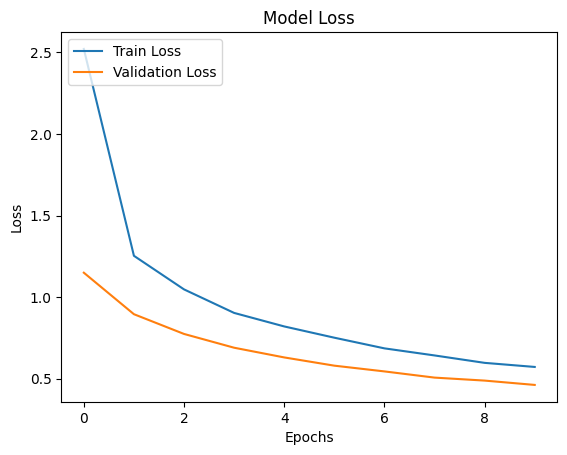

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [ ]:
#its prettry good lets do some hypterparameter tuning i will add batch normalization and early stopping"

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

# Load the pre-trained DenseNet121 base model
conv_base = DenseNet121(
    weights='imagenet',  # Use ImageNet weights
    include_top=False,  # Do not include the fully connected layers
    input_shape=(256, 256, 3),
    pooling='avg'  # Global average pooling
)

# Build the model using Sequential API
model = Sequential()

# Add the pre-trained ConvBase (DenseNet121)
model.add(conv_base)

# Add BatchNormalization after ConvBase
model.add(BatchNormalization())

# Flatten the output of ConvBase before adding dense layers
model.add(Flatten())

# Add first dense layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.35))

# Add BatchNormalization after the first dense layer
model.add(BatchNormalization())

# Add second dense layer with 120 units and ReLU activation
model.add(Dense(120, activation='relu'))

# Output layer with 10 units (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,337,074 (27.99 MB)

 Trainable params: 7,250,866 (27.66 MB)

 Non-trainable params: 86,208 (336.75 KB)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Now you can use the early_stopping_callback in model.fit
model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32, callbacks=[early_stopping_callback])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 366s 656ms/step - accuracy: 0.7781 - loss: 0.6928 - val_accuracy: 0.6970 - val_loss: 1.3847
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 129s 332ms/step - accuracy: 0.9244 - loss: 0.2354 - val_accuracy: 0.8750 - val_loss: 0.4084
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 333ms/step - accuracy: 0.9523 - loss: 0.1421 - val_accuracy: 0.8400 - val_loss: 0.5602
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.9589 - loss: 0.1196 - val_accuracy: 0.8460 - val_loss: 0.4940
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 346ms/step - accuracy: 0.9705 - loss: 0.0969 - val_accuracy: 0.8970 - val_loss: 0.3454
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.9712 - loss: 0.0852 - val_accuracy: 0.7270 - val_loss: 1.1946
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 345ms/step - accuracy: 0.9708 - loss: 0.0866 - val_accuracy: 0.8820 - val_loss: 0.4364
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 106s 337ms/step - accuracy: 0.9722 -

In [37]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8983 - loss: 0.3295
Validation Loss: 0.3453960716724396
Validation Accuracy: 0.8970000147819519


In [44]:
# Ensure the model is loaded
model = tf.keras.models.load_model('tomato_disease_model.keras', compile=False)

# Make predictions on the validation data
predictions = model.predict(val_data)

# Get the predicted classes (the index with the highest probability)
predicted_classes = predictions.argmax(axis=1)

# If you want to see the predicted class labels:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
               'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
               'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
               'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
               'Tomato___healthy']

# Limit the loop to print only the first 20 predictions
for i, class_index in enumerate(predicted_classes[:20]):
    print(f"Image {i+1} predicted as: {class_names[class_index]}")




32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 397ms/step
Image 1 predicted as: Tomato___Late_blight
Image 2 predicted as: Tomato___Septoria_leaf_spot
Image 3 predicted as: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 4 predicted as: Tomato___Bacterial_spot
Image 5 predicted as: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 6 predicted as: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 7 predicted as: Tomato___Bacterial_spot
Image 8 predicted as: Tomato___Spider_mites Two-spotted_spider_mite
Image 9 predicted as: Tomato___Early_blight
Image 10 predicted as: Tomato___Early_blight
Image 11 predicted as: Tomato___Tomato_mosaic_virus
Image 12 predicted as: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Image 13 predicted as: Tomato___Tomato_mosaic_virus
Image 14 predicted as: Tomato___Target_Spot
Image 15 predicted as: Tomato___healthy
Image 16 predicted as: Tomato___Spider_mites Two-spotted_spider_mite
Image 17 predicted as: Tomato___Leaf_Mold
Image 18 predicted as: Tomato___Bacterial_spot
Image 19 predicted as: To

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


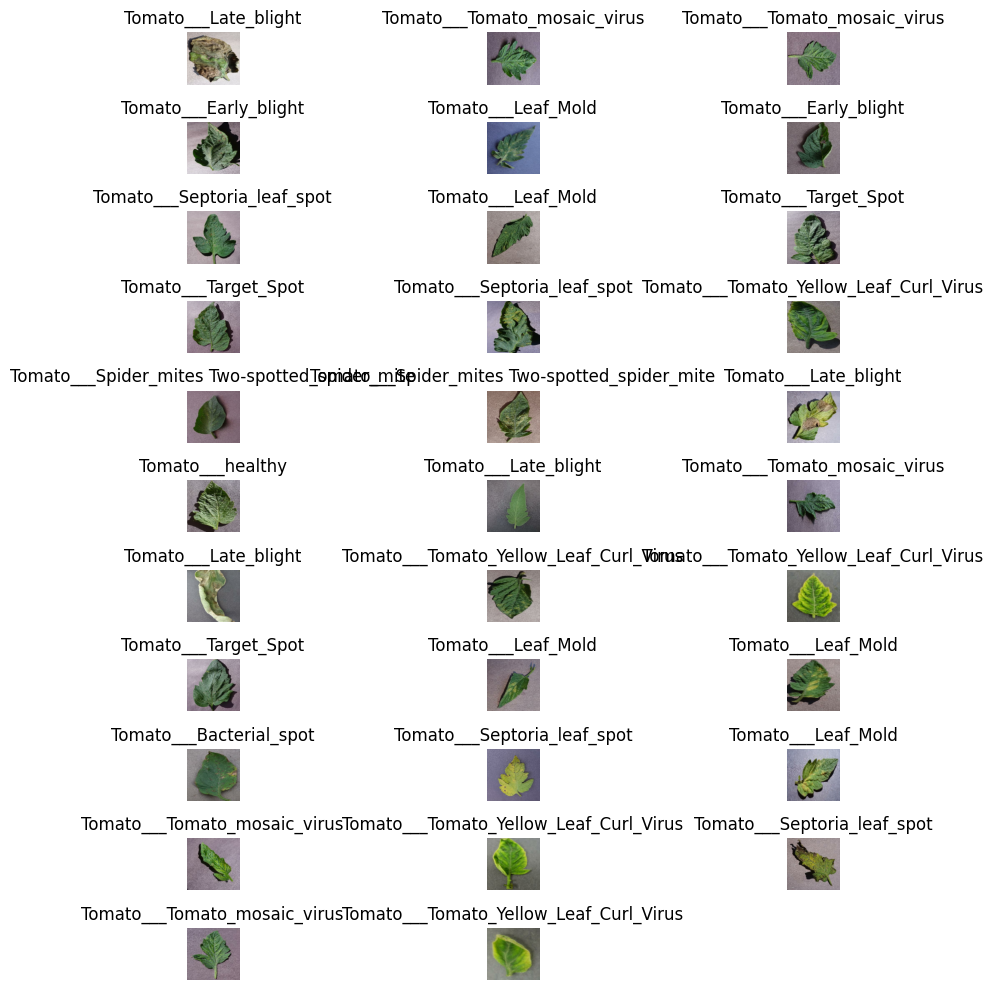

In [50]:


# Display a batch of images from val_data along with predictions
for images, labels in val_data.take(1):  # Take one batch
    predictions = model.predict(images)  # Get predictions for this batch
    predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices

    # Calculate the number of rows and columns for the grid
    num_images = len(images)
    num_cols = 3  # You can adjust this
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate rows needed

    plt.figure(figsize=(10, 10))
    for i in range(num_images):  # Iterate through all images in the batch
        plt.subplot(num_rows, num_cols, i + 1)  # Dynamically adjust grid

        # Convert tensor to numpy array and normalize between 0 and 1
        image_to_display = images[i].numpy()  # Convert tensor to numpy
        if image_to_display.max() > 1:  # If the image has been scaled to [0, 255], normalize to [0, 1]
            image_to_display = image_to_display / 255.0

        plt.imshow(image_to_display)  # Display the image
        plt.title(class_names[predicted_classes[i]])  # Show predicted class
        plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


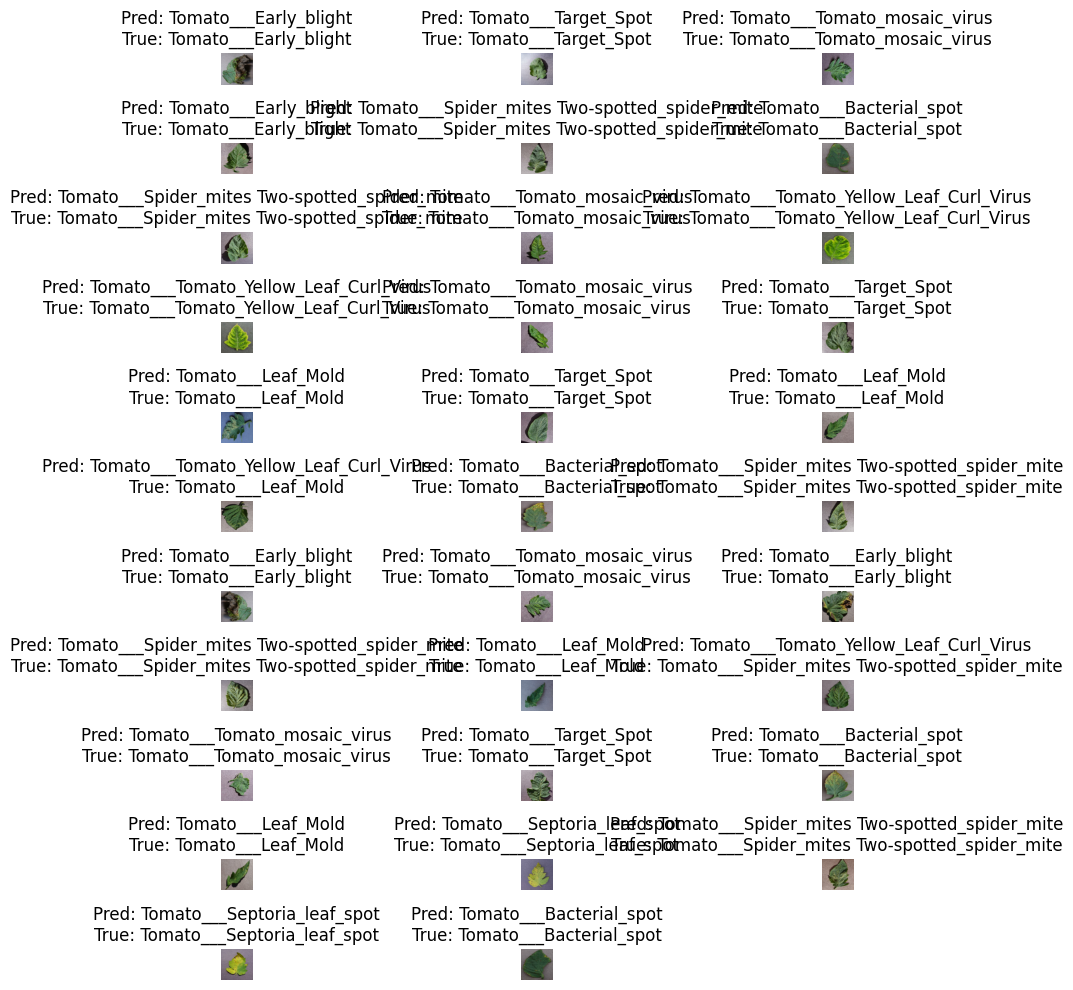

In [51]:
# Display a batch of images from val_data along with predictions and actual labels
for images, labels in val_data.take(1):  # Take one batch
    predictions = model.predict(images)  # Get predictions for this batch
    predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices
    actual_classes = np.argmax(labels, axis=1)  # Convert the one-hot encoded labels to class indices

    # Calculate the number of rows and columns for the grid
    num_images = len(images)
    num_cols = 3  # You can adjust this
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate rows needed

    plt.figure(figsize=(10, 10))
    for i in range(num_images):  # Iterate through all images in the batch
        plt.subplot(num_rows, num_cols, i + 1)  # Dynamically adjust grid

        # Convert tensor to numpy array and normalize between 0 and 1
        image_to_display = images[i].numpy()  # Convert tensor to numpy
        if image_to_display.max() > 1:  # If the image has been scaled to [0, 255], normalize to [0, 1]
            image_to_display = image_to_display / 255.0

        plt.imshow(image_to_display)  # Display the image

        # Show predicted class and actual class
        predicted_label = class_names[predicted_classes[i]]
        actual_label = class_names[actual_classes[i]]
        plt.title(f"Pred: {predicted_label}\nTrue: {actual_label}")  # Show both predicted and actual labels
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


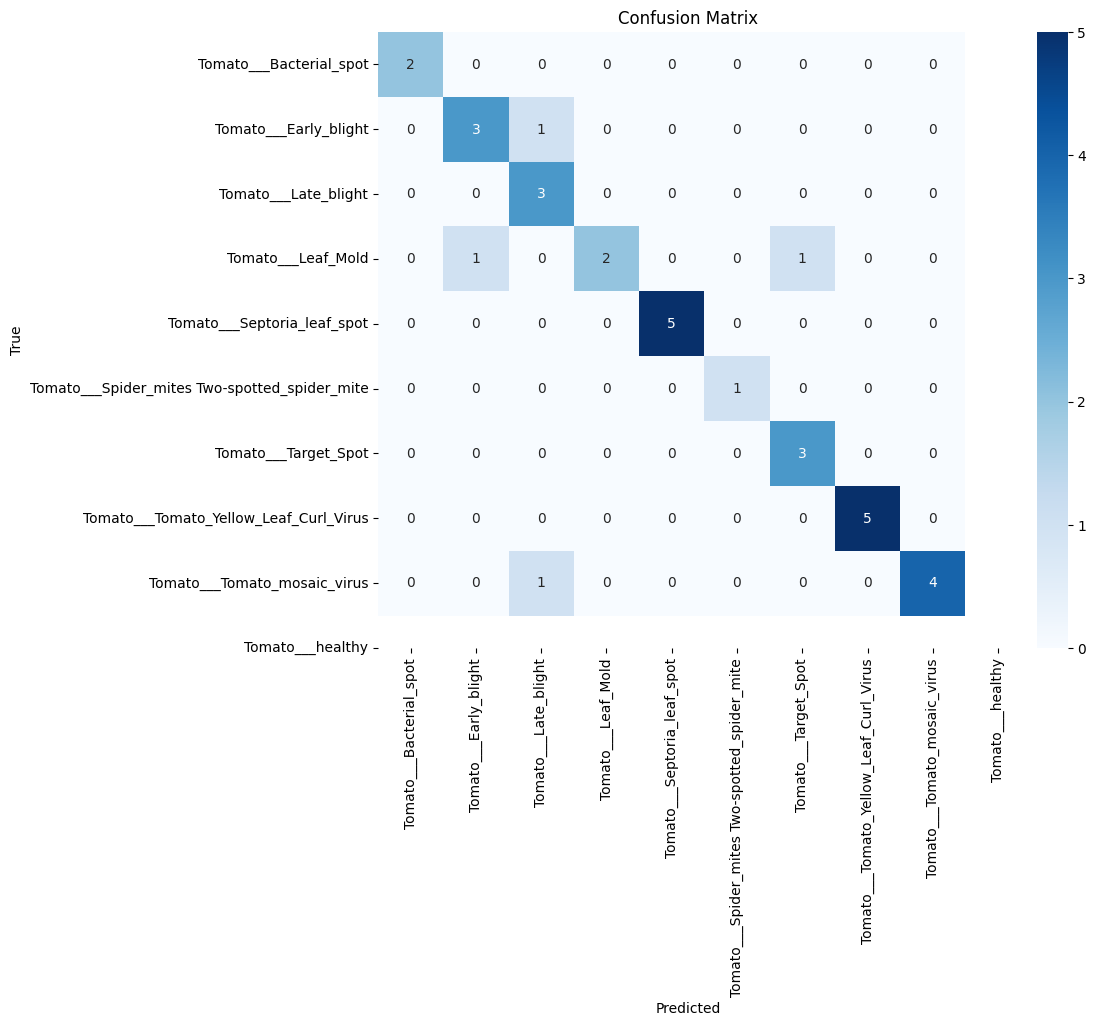

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

# Get predictions and actual labels
y_true = []
y_pred = []

for images, labels in val_data.take(1):  # Take one batch from the validation data
    # Get the model's predictions
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(labels, axis=1)  # Convert one-hot to class indices

    # Collect the actual and predicted class labels
    y_true.extend(actual_classes)
    y_pred.extend(predicted_classes)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.9078125
Recall: 0.875
F1 Score: 0.8728918650793651


In [57]:
model.save('/content/tomato_disease_model.keras')
  # Save model to Colab's environment
 # or .h5 format


In [58]:
from google.colab import files
files.download('/content/tomato_disease_model.keras')  # This will download it to your default downloads folder


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.8 MB/s eta 0:00:00
